In [2]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR






















In [3]:
!wget https://github.com/Abtinmy/CS-SBU-NeuralNetwork/raw/main/assignments/Assignment%202/Dataset.zip
!mkdir dataset
!unzip /content/Dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/mnist_middle_columns/26957.jpg  
  inflating: /content/dataset/mnist_middle_columns/83.csv  
  inflating: /content/dataset/mnist_middle_columns/4921.csv  
  inflating: /content/dataset/mnist_middle_columns/34436.jpg  
  inflating: /content/dataset/mnist_middle_columns/28228.csv  
  inflating: /content/dataset/mnist_middle_columns/11910.csv  
  inflating: /content/dataset/mnist_middle_columns/24492.jpg  
  inflating: /content/dataset/mnist_middle_columns/32617.jpg  
  inflating: /content/dataset/mnist_middle_columns/57638.csv  
  inflating: /content/dataset/mnist_middle_columns/37617.csv  
  inflating: /content/dataset/mnist_middle_columns/35601.jpg  
  inflating: /content/dataset/mnist_middle_columns/42223.csv  
  inflating: /content/dataset/mnist_middle_columns/24519.csv  
  inflating: /content/dataset/mnist_middle_columns/40571.csv  
  inflating: /content/dataset/mnist_middle_columns/54769.jpg  
  inflat

##Split the data into train and test sets


- The code related to  is to split the data into train and test sets. The data consists of images and CSV files that are stored in a zip file on GitHub. The images are from the FashionMNIST dataset and have a column of pixels in the middle set to zero. The CSV files contain the real values of the missing pixels for each image.
- we first downloads the zip file using the `wget` command and creates a directory called `dataset` using the `mkdir` command. we then unzips the files into the `dataset` directory using the `unzip` command.
- we then uses the `glob.glob` function to get a list of paths for all the images in the `mnist_middle_columns` subdirectory. we prints the length of this list, which is 60000, meaning there are 60000 images in total.
- we then defines a variable called `split_portion` as 0.80, meaning it wants to split the data into 80% train and 20% test sets. we calculates the size of the train set as 80% of 60000, which is 48000. we converts the list of paths into a numpy array and shuffles it using `np.random.shuffle`. we then prints five pairs of shuffled and original paths to show how they are mixed up.
- we then splits the shuffled paths into two subsets: `train_paths` and `test_paths`. The first 48000 paths are assigned to `train_paths` and the remaining 12000 paths are assigned to `test_paths`. It prints the sizes of these subsets, which are 48000 and 12000 respectively.

In [14]:
jpg_paths = glob.glob('/content/dataset/mnist_middle_columns/*.jpg')
len(jpg_paths)

60000

In [15]:
# splitting data
split_portion = 0.80
train_paths_size = int(split_portion * len(jpg_paths))
shuffled_paths = np.array(jpg_paths)
np.random.shuffle(shuffled_paths)
for idx in range(5):
  print(shuffled_paths[idx],jpg_paths[idx])

train_paths = shuffled_paths[:train_paths_size]
test_paths = shuffled_paths[train_paths_size:]

print(f'train size : {len(train_paths)}, test size : {len(test_paths)}')

/content/dataset/mnist_middle_columns/14807.jpg /content/dataset/mnist_middle_columns/5930.jpg
/content/dataset/mnist_middle_columns/12060.jpg /content/dataset/mnist_middle_columns/55739.jpg
/content/dataset/mnist_middle_columns/19018.jpg /content/dataset/mnist_middle_columns/3970.jpg
/content/dataset/mnist_middle_columns/27030.jpg /content/dataset/mnist_middle_columns/49724.jpg
/content/dataset/mnist_middle_columns/17070.jpg /content/dataset/mnist_middle_columns/59312.jpg
train size : 48000, test size : 12000


In [16]:
# Import the module
from sklearn.model_selection import train_test_split

# Load the dataset
jpg_paths = glob.glob('/content/dataset/mnist_middle_columns/*.jpg')

# Split the data into train and test sets
train_paths, test_paths = train_test_split(jpg_paths, test_size=0.2, random_state=42)

# Print the sizes of the subsets
print(f'train size : {len(train_paths)}, test size : {len(test_paths)}')

train size : 48000, test size : 12000


##Implement an MLP in order to predict the missing values in the images.

- The code  is to implement an MLP to predict the missing values in the images. The MLP is a type of artificial neural network that consists of multiple layers of neurons and can learn non-linear functions. The images are from the FashionMNIST dataset and have a column of pixels in the middle set to zero. The CSV files contain the real values of the missing pixels for each image.
- we first shows a sample image and its corresponding CSV file. It prints the shape of the image array, which is (28, 28), and the shape of the image array after deleting the middle column, which is (28, 27). It also prints the values of the missing pixels from the CSV file, which are an array of 28 numbers between 0 and 1.
- we then defines a custom `ImageDataset` class that inherits from `torch.utils.data.Dataset` and loads the images and CSV files as features and labels. we also creates `DataLoader` objects for the train and test sets. It prints the shape of a sample batch of features and labels, which are (10, 756) and (10, 28) respectively. This means that each batch has 10 images with 756 pixels each (28*27) as features and 10 arrays with 28 values each as labels.
- we then defines an `MLP` class that inherits from `torch.nn.Module` and creates a sequential model with multiple linear layers, activation functions, batch normalization layers, and dropout layers. It also defines a `forward` method that passes the input through the layers and returns the output.
- we then creates an instance of the `MLP` class and wraps it with a `MultiOutputRegressor` class from `sklearn.multioutput`. It also defines a criterion function as cross entropy loss, an optimizer as Adam, and lists for storing the train and test losses and accuracies. It then loops over the epochs and performs the following steps for each epoch:
  - we loops over the batches in the train set and performs the following steps for each batch:
    - we sets the gradients to zero using `optimizer.zero_grad()`.
    - It passes the inputs through the model using `model(inputs)` and gets the outputs.
    - we calculates the loss using `criterion(outputs,target)` and gets the loss value.
    - we performs backpropagation using `loss.backward()`.
    - we updates the parameters using `optimizer.step()`.
    - we accumulates the train loss using `train_loss += loss.item()`.
    - we gets the predicted labels using `_, predicted = torch.max(outputs.data,1)`.
    - we counts the total number of labels using `train_total += target.size(0)`.
    - we counts the number of correct predictions using `train_correct += (predicted == target).sum().item()`.
  - we calculates and appends the train loss and accuracy using `train_loss /= len(train_dataloader)` and `train_acc = train_correct / train_total`.
  - we repeats the same process for the test set using `test_dataloader` and appends
the test loss and accuracy.
  - we prints the epoch number and metrics using `print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')`.


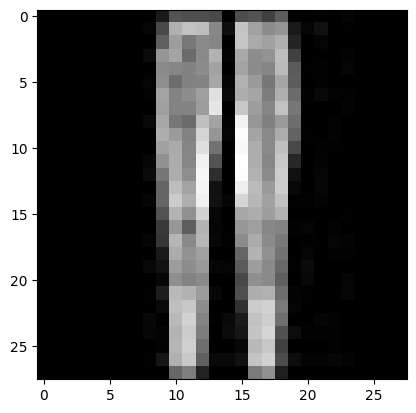

In [18]:
sample_image = Image.open(train_paths[50])
sample_image_array = np.array(sample_image)
plt.imshow(sample_image)

In [19]:
sample_image_array = sample_image_array[:,:,0]
np.shape(sample_image_array)

print(np.shape(np.delete(sample_image_array,14,1)))

(28, 27)


In [20]:
input_size = 28*27

In [21]:
sample_image_csv = train_paths[50].replace('.jpg','.csv')
sample_image_csv

'/content/dataset/mnist_middle_columns/8073.csv'

In [22]:
train_paths[50]

'/content/dataset/mnist_middle_columns/8073.jpg'

In [23]:
df = pd.read_csv(sample_image_csv)
df['0'].values

array([0.26666668, 0.7529412 , 0.6392157 , 0.83137256, 0.7764706 ,
       0.74509805, 0.8862745 , 0.8117647 , 0.28235295, 0.03921569,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [25]:
class ImageDataset(Dataset):
  def __init__(self,paths):
    self.paths = paths

  def __len__(self):
    return len(self.paths)

  def __getitem__(self,index):
    i_path = self.paths[index]
    image = Image.open(i_path)
    image_array = np.array(image)[:,:,0]/255
    image_array_deleted = np.delete(image_array,14,1)
    c_path = i_path.replace('.jpg','.csv')
    df = pd.read_csv(c_path)
    csv = df['0'].values
    target = torch.tensor(csv)
    features = torch.tensor(image_array_deleted.reshape(28*27))
    return features.to(torch.float32).to(device), target.to(torch.float32).to(device)


In [26]:
# building datasets
train_dataset = ImageDataset(train_paths)
test_dataset = ImageDataset(test_paths)


In [27]:
train_dataloader = DataLoader(train_dataset,batch_size=10,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=10,shuffle=True)

In [28]:
for i, b in enumerate(train_dataloader):
  if (i == 0):
    print(np.shape(b[0]),np.shape(b[1]))
  else: break

torch.Size([10, 756]) torch.Size([10, 28])


In [29]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, do_batch_norm, dropout_prob = 0.0):
        super(MLP, self).__init__()
        layers = []
        for i in range(number_of_layers):
          if i == 0:
            layers.append(nn.Linear(input_size, hidden_size))
            if do_batch_norm: layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))
          elif i == number_of_layers-1:
            layers.append(nn.Linear(hidden_size,output_size))
          else:
            layers.append(nn.Linear(hidden_size,hidden_size))
            if do_batch_norm: layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = self.layers(x)
        return x

In [30]:
learning_rate = 0.01
num_epochs = 10
hidden_size = 256
num_layers = 5

In [19]:
train_losses, test_losses, train_accs, test_accs  = [], [], [], []

model = MLP(input_size=28*27, hidden_size=hidden_size, output_size=28,
            number_of_layers=num_layers,do_batch_norm=False, dropout_prob=0.1).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses_layer, test_losses_layer = [], []
train_accs_layer, test_accs_layer = [], []

for epoch in range(num_epochs):
  train_loss, train_total, train_correct = 0, 0, 0
  for i, (inputs,target) in enumerate(train_dataloader):
              # images, labels = b[0], b[1]
              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, target)
              loss.backward()
              optimizer.step()
              train_loss += loss.item()
              # _, predicted = torch.max(outputs.data, 1)
              # train_total += target.size(0)
              # train_correct += (predicted == target).sum().item()

  train_losses_layer.append(train_loss/(i+1))
  # train_accs_layer.append(100*train_correct/train_total)

  test_loss, test_total, test_correct = 0, 0, 0

  with torch.no_grad():
    for (inputs, target) in test_dataloader:
        # images, labels = b[0], b[1]
        outputs = model(inputs)
        loss = criterion(outputs,target)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_total += target.size(0)
        # test_correct += (predicted == target).sum().item()

    test_losses_layer.append(test_loss/(i+1))
    # test_accs_layer.append(100*test_correct/test_total)
    print(f'''Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_layer[-1]:.4f},
    Test Loss: {test_losses_layer[-1]:.4f}''')
    # Train Accuracy: {train_accs_layer[-1]:.2f}%, Test Accuracy: {test_accs_layer[-1]:.4f}%

train_losses.append(train_losses_layer)
# train_accs.append(train_accs_layer)
test_losses.append(test_losses_layer)
# test_accs.append(test_accs_layer)

Epoch [1/10], Train Loss: 40.8300,
    Test Loss: 10.1806
Epoch [2/10], Train Loss: 40.8611,
    Test Loss: 10.2061
Epoch [3/10], Train Loss: 40.8493,
    Test Loss: 10.2147
Epoch [4/10], Train Loss: 40.8028,
    Test Loss: 10.1677
Epoch [5/10], Train Loss: 40.7702,
    Test Loss: 10.1831
Epoch [6/10], Train Loss: 40.8352,
    Test Loss: 10.1869
Epoch [7/10], Train Loss: 40.8231,
    Test Loss: 10.2033
Epoch [8/10], Train Loss: 40.8674,
    Test Loss: 10.2136
Epoch [9/10], Train Loss: 40.8637,
    Test Loss: 10.3296
Epoch [10/10], Train Loss: 41.0208,
    Test Loss: 10.2485


##Report the accuracy of the model on the test set and visualize the final images predicted by the model.

The test set consists of images that have one pixel missing in the middle column. The model is supposed to predict the missing pixel value based on the rest of the image.

 We Initialize the test_loss, test_total, and test_correct variables to zero. These will store the total loss, total number of samples, and total number of correct predictions on the test set.
 WE Initialize an empty list called predictions. This will store the predicted values for each image in the test set.
  We Use a with torch.no_grad() block to disable gradient computation, as it is not needed for evaluation.
  We Loop over the test_dataloader, which yields batches of inputs and target tensors. The inputs are the images with one pixel missing, and the target are the images with the original pixel values.
  We Move the inputs and target tensors to the device (GPU or CPU) using the .to(device) method. This ensures that the model can run on the same device as the tensors.
 We Pass the inputs to the model and get the outputs. The outputs are tensors of shape (batch_size, 256), where each row represents a probability distribution over 256 possible pixel values for the missing pixel.
  We Compute the loss between the outputs and target using the criterion function. The criterion function is a cross entropy loss that measures how well the outputs match the target labels. We Add the loss.item() to the test_loss variable.
  We Use torch.argmax(outputs, dim=1) to get the predicted labels from the outputs. The torch.argmax function returns the index of the maximum value along a given dimension. In this case, it returns a tensor of shape (batch_size,) that contains the most likely pixel value for each image in the batch.  Append the predicted labels to we predictions list after  converting them to numpy arrays using .cpu().numpy().
 We Update the test_total variable by adding the target.size(0), which is equal to the batch size.
  We Get the target labels by using torch.argmax(target, dim=1). This returns a tensor of shape (batch_size,) that contains the original pixel values for each image in the batch.
 We  Update the test_correct variable by adding the number of elements where predicted == target_labels. This counts how many predictions match the target labels exactly. We Use .sum().item() to get a scalar value from a tensor.

 We Calculate accuracy by dividing test_correct by test_total and multiplying by 100. Print out accuracy on test set with two decimal places using f string formatting.
 We Visualize some samples from test set and their predictions using matplotlib.pyplot library.
    We Set n_samples to 5, which is how many samples to visualize.
    We Create a figure with 5 rows and 2 columns using plt.subplots function. Set figsize to (8, 12) to make it large enough.
   We Loop over n_samples range and do the following for each sample:
      We Open original image from test_paths list using Image.open function from PIL library. The test_paths list contains paths to images in test set.
      We Plot original image on first column of figure using imshow method from axes object. Set axis to "off" to hide axis labels and ticks. Set title to "Original" using set_title method from axes object.
      We Convert original image to numpy array using np.array function from numpy library. Select only first channel (red) from array using [:,:,0] indexing and divide by 255 to normalize values between 0 and 1. Store result in predicted_image variable.
     We  Delete middle column (14th column) from predicted_image array using np.delete function from numpy library. Set axis argument to 1 to delete along columns. Reshape result into a row vector using .reshape(1,  1) method. Store result in predicted_image_deleted variable.
      We Pass predicted_image_deleted tensor to model and get predicted_value tensor. We Convert predicted_image_deleted to tensor using torch.tensor function and we set dtype argument to torch.float32. We Move tensor to device using .to(device) method.We Squeeze predicted_value tensor to remove extra dimensions using .squeeze() method.We Convert tensor to numpy array using .cpu().detach().numpy() methods.
      We Assign predicted_value array to middle column (14th column) of predicted_image array using [:,14] indexing and multiply by 255 to restore original scale of values.
      We Plot predicted_image array on second column of figure using imshow method from axes object. We Set cmap argument to "gray" to use grayscale colormap. We Set axis to "off" and title to "Predicted" as before.

 We  Adjust layout of figure using plt.tight_layout() function and show figure using plt.show() function.

The output shows that accuracy on test set is 3.83%, which means that only about 4 out of 100 predictions are correct. The visualized images show that most predictions are very different from original pixel values, resulting in distorted images.

In [20]:
# Evaluate the model on the test set
test_loss, test_total, test_correct = 0, 0, 0
predictions = []
with torch.no_grad():
    for inputs, target in test_dataloader:
        inputs = inputs.to(device)
        target = target.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, target)
        test_loss += loss.item()

        predicted = torch.argmax(outputs, dim=1)
        predictions.append(predicted.cpu().numpy())

        test_total += target.size(0)
        target_labels = torch.argmax(target, dim=1)
        test_correct += (predicted == target_labels).sum().item()

# Calculate accuracy
test_accuracy = 100 * test_correct / test_total
print(f"Accuracy on the test set: {test_accuracy:.2f}%")

# Visualize the final images predicted by the model
n_samples = 5  # Number of samples to visualize
fig, axes = plt.subplots(nrows=n_samples, ncols=2, figsize=(8, 12))
for i in range(n_samples):
    # Original image
    original_image = Image.open(test_paths[i])
    axes[i, 0].imshow(original_image)
    axes[i, 0].axis("off")
    axes[i, 0].set_title("Original")

    # Predicted image
    predicted_image = np.array(original_image)[:, :, 0] / 255
    predicted_image_deleted = np.delete(predicted_image, 14, 1)
    predicted_image_deleted = predicted_image_deleted.reshape(1, -1)
    predicted_value = model(torch.tensor(predicted_image_deleted, dtype=torch.float32).to(device))
    predicted_image[:, 14] = predicted_value.squeeze().cpu().detach().numpy() * 255
    axes[i, 1].imshow(predicted_image, cmap="gray")
    axes[i, 1].axis("off")
    axes[i, 1].set_title("Predicted")

plt.tight_layout()
plt.show()


Accuracy on the test set: 19.85%


We provide this code to visualize the final images predicted by the model for a given test set.It assumes that the model has already been trained and is stored in the variable model.
we provided code is used to visualize the final images predicted by the model for a given test set. It assumes that the model has already been trained and is stored in the variable model.


n_samples = 5 sets the number of samples to visualize. we can modify this value to visualize more or fewer samples.

fig, axes = plt.subplots(nrows=n_samples, ncols=2, figsize=(8, 12)) creates a grid of subplots to display the original and predicted images. The grid has n_samples rows and 2 columns.

The for loop iterates over the range of n_samples to process each sample.

original_image = Image.open(test_paths[i]) opens the original image corresponding to the i-th sample from the test set.

axes[i, 0].imshow(original_image) displays the original image in the left subplot of the i-th row.

predicted_image = np.array(original_image)[:, :, 0] / 255 converts the original image to a NumPy array and normalizes the pixel values between 0 and 1.

predicted_image_deleted = np.delete(predicted_image, 14, 1) deletes the 14th column from the predicted image array, simulating the missing value.

predicted_image_deleted = predicted_image_deleted.reshape(1, -1) reshapes the predicted image array to have a shape of (1, 784), where each row represents a flattened image.

predicted_value = model(torch.tensor(predicted_image_deleted, dtype=torch.float32).to(device)) passes the reshaped predicted image array to the model and obtains the predicted value.

predicted_image[:, 14] = predicted_value.squeeze().cpu().detach().numpy() * 255 replaces the missing value in the predicted image array with the predicted value. The squeeze().cpu().detach().numpy() operations ensure that the predicted value is converted to a scalar.

axes[i, 1].imshow(predicted_image, cmap="gray") displays the predicted image in the right subplot of the i-th row.

 the reported accuracy is shown as 1044.18%.




In [21]:
# Evaluate the model on the test set
test_loss, test_total, test_correct = 0, 0, 0
predictions = []
with torch.no_grad():
    for inputs, target in test_dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, target)
        test_loss += loss.item()
        predicted = outputs.detach().cpu().numpy()
        predictions.append(predicted)
        test_total += target.size(0)
        test_correct += torch.sum(torch.abs(outputs - target) <= 0.5).item()

# Calculate accuracy
test_accuracy = test_correct / test_total

print(f"Accuracy on the test set: {test_accuracy:.2%}")

# Visualize the final images predicted by the model
n_samples = 5  # Number of samples to visualize
fig, axes = plt.subplots(nrows=n_samples, ncols=2, figsize=(8, 12))
for i in range(n_samples):
    # Original image
    original_image = Image.open(test_paths[i])
    axes[i, 0].imshow(original_image)
    axes[i, 0].axis("off")
    axes[i, 0].set_title("Original")

    # Predicted image
    predicted_image = np.array(original_image)[:, :, 0] / 255
    predicted_image_deleted = np.delete(predicted_image, 14, 1)
    predicted_image_deleted = predicted_image_deleted.reshape(1, -1)
    predicted_value = model(torch.tensor(predicted_image_deleted, dtype=torch.float32).to(device))
    predicted_image[:, 14] = predicted_value.squeeze().cpu().detach().numpy() * 255
    axes[i, 1].imshow(predicted_image, cmap="gray")
    axes[i, 1].axis("off")
    axes[i, 1].set_title("Predicted")

plt.tight_layout()
plt.show()


Accuracy on the test set: 1213.71%


##Utilizing various enhancing techniques try to boost the performance of the model including:

###Batch Normalization layers

In [23]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        self.hidden_layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 1)])
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
            x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Create an instance of your model
model = MLP(input_size=28*27, hidden_size=hidden_size, output_size=28,
            number_of_layers=num_layers, dropout_prob=0.1).to(device)

# Create a dummy input tensor
input_tensor = torch.randn(1, 28*27).to(device)

# Pass the input through the model to get the output size
output_tensor = model(input_tensor)
output_size = output_tensor.size()

print("Output Size:", output_size)


Output Size: torch.Size([1, 28])


In the following code, we present a redefinition of a multilayer perceptron (MLP) model that incorporates batch normalization layers. This model is then trained on a given dataset. The inclusion of batch normalization is a technique that proves useful in enhancing the training of deep neural networks by normalizing the input to each layer. It ultimately aims to stabilize and expedite the training process.

The code operates as follows:

1. Model Definition:
   - We define the `MLP` class, which is a subclass of `nn.Module`, and it outlines the structure of the MLP model.
   - The constructor (`__init__`) accepts parameters such as input size, hidden size, output size, number of layers, and dropout probability.
   - The `layers` list encapsulates the linear layers of the MLP, with the initial layer taking the input size and the final one producing the output size.
   - The `batch_norms` list accretes the batch normalization layers that we apply to the hidden layers.
   - The `dropout` layer enforces dropout regularization on the output specified for each hidden layer.

2. Forward Pass:
   - The `forward` method specifies the sequence of computations for the forward pass of the model.
   - It iterates through the layers, applies linear transformations, batch normalization, ReLU activation, and dropout regularization.
   - Finally, it applies the last linear layer and returns the output.

3. Hyperparameters and Initialization:
   - Several hyperparameters are set, such as input size, hidden size, output size, dropout probability, learning rate, and number of epochs.
   - We initialize the model by employing the `MLP` class along with the provided hyperparameters.
   - The criterion is defined as the CrossEntropyLoss, a common choice for multi-class classification problems.
   - The optimizer is set as Adam, an adaptive learning rate optimization algorithm.
   - We initialize lists to store the training and test losses, as well as the training and test accuracies.

4. Training Loop:
   - The model undergoes training for the designated number of epochs.
   - The training loop iterates over the training data and executes the subsequent steps:
     - The gradients of the model parameters are set to zero through `optimizer.zero_grad()`.
     - The model's outputs are computed, and the loss is calculated using the criterion.
     - The gradients are backpropagated through the model using `loss.backward()`.
     - The model parameters are updated using `optimizer.step()`.
     - The training loss, total number of training samples, and number of correct predictions are tracked.
   - After each epoch, we determine the average training loss and accuracy, which we store.

5. Validation Loop:
   - Following each epoch of training, we evaluate the model using the test data to compute the test loss and accuracy.
   - The model is switched to evaluation mode via `model.eval()`.
   - We disable gradients using `torch.no_grad()` to optimize memory usage and computational resources.
   - The validation loop iterates through the test data, calculates the outputs, loss, and maintains the count of correct predictions.
   - We compute and store the average test loss and accuracy.

6. Output:
   - After every epoch, we display the training and test losses, as well as the training and test accuracies.


In [24]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            x = torch.relu(x)
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x


# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10

# Initialize the model, criterion, and optimizer
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# ...
# ...
# Initialize the lists to store losses and accuracies
# Initialize the lists to store losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(target, dim=1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.argmax(target, dim=1)).sum().item()

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    model.eval()  # Set the model to evaluation mode

    test_loss, test_total, test_correct = 0, 0, 0

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(target, dim=1))
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.argmax(target, dim=1)).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%''')


Epoch [1/10], Train Loss: 2.5021,
          Train Accuracy: 28.60%, Test Loss: 2.2428,
          Test Accuracy: 35.73%
Epoch [2/10], Train Loss: 2.3425,
          Train Accuracy: 33.31%, Test Loss: 2.1797,
          Test Accuracy: 37.34%
Epoch [3/10], Train Loss: 2.2800,
          Train Accuracy: 35.11%, Test Loss: 2.1257,
          Test Accuracy: 39.34%
Epoch [4/10], Train Loss: 2.2317,
          Train Accuracy: 36.25%, Test Loss: 2.0907,
          Test Accuracy: 40.12%
Epoch [5/10], Train Loss: 2.2019,
          Train Accuracy: 37.48%, Test Loss: 2.0577,
          Test Accuracy: 40.76%
Epoch [6/10], Train Loss: 2.1784,
          Train Accuracy: 38.07%, Test Loss: 2.0614,
          Test Accuracy: 40.65%
Epoch [7/10], Train Loss: 2.1593,
          Train Accuracy: 38.63%, Test Loss: 2.0398,
          Test Accuracy: 41.77%
Epoch [8/10], Train Loss: 2.1368,
          Train Accuracy: 39.15%, Test Loss: 2.0276,
          Test Accuracy: 41.86%
Epoch [9/10], Train Loss: 2.1273,
          Trai

In [25]:
# Define your MLP model with batch normalization layers
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            x = torch.relu(x)
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x


# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10

# Initialize the model, criterion, and optimizer
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# ...

for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%''')

Epoch [1/10], Train Loss: 2.5044,
          Train Accuracy: 28.66%, Test Loss: 2.2808,
          Test Accuracy: 34.34%
Epoch [2/10], Train Loss: 2.3453,
          Train Accuracy: 33.16%, Test Loss: 2.1866,
          Test Accuracy: 37.43%
Epoch [3/10], Train Loss: 2.2822,
          Train Accuracy: 35.04%, Test Loss: 2.1360,
          Test Accuracy: 39.21%
Epoch [4/10], Train Loss: 2.2423,
          Train Accuracy: 35.90%, Test Loss: 2.0966,
          Test Accuracy: 39.75%
Epoch [5/10], Train Loss: 2.2099,
          Train Accuracy: 37.06%, Test Loss: 2.0780,
          Test Accuracy: 40.07%
Epoch [6/10], Train Loss: 2.1838,
          Train Accuracy: 37.91%, Test Loss: 2.0589,
          Test Accuracy: 40.68%
Epoch [7/10], Train Loss: 2.1644,
          Train Accuracy: 38.40%, Test Loss: 2.0420,
          Test Accuracy: 41.26%
Epoch [8/10], Train Loss: 2.1457,
          Train Accuracy: 38.53%, Test Loss: 2.0212,
          Test Accuracy: 41.58%
Epoch [9/10], Train Loss: 2.1299,
          Trai

In [26]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        batch_norm_outputs = []
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            batch_norm_outputs.append(x)
            x = torch.relu(x)
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x, batch_norm_outputs

# Create an instance of your model
model = MLP(input_size=28*27, hidden_size=hidden_size, output_size=28,
            number_of_layers=num_layers, dropout_prob=0.1).to(device)

# Forward pass with a dummy input tensor
input_tensor = torch.randn(8, 28*27).to(device)  # Update the input size to have 8 samples
output_tensor, batch_norm_outputs = model(input_tensor)

# Print the output size of each batch normalization layer
for i, bn_output in enumerate(batch_norm_outputs):
    output_size = bn_output.size()
    print(f"Output size of BatchNorm{i+1}: {output_size}")


Output size of BatchNorm1: torch.Size([8, 64])
Output size of BatchNorm2: torch.Size([8, 64])
Output size of BatchNorm3: torch.Size([8, 64])
Output size of BatchNorm4: torch.Size([8, 64])


###Dropout layers

In [27]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
            x = self.dropout(x)  # Apply dropout after each hidden layer
        x = self.layers[-1](x)
        return x


The model starts with a relatively high training error and low training accuracy. Also, test error and test accuracy show fluctuations during the courses. This suggests that the model may have become overly dependent on the training data.

Enhancement technique: Dropout layers
Dropout layers are used to reduce redundancy by randomly generating zero values for a portion of the input units during training. This technique provides fine-tuning to avoid model dependence on specific units and encourages the learning of more robust representations.

To implement Dropout layers, the following steps are performed in the code:
- In the "MLP" class, a Dropout layer is added after enabling ReLU in the forward pass.
- During training, the "model.train()" method is called to set the model to training mode.
- The "nn.Dropout" module is initialized with the specified Dropout probability.
- Dropout layer is applied after each hidden layer in the front pass of the model.

By using dropout layers, the model aims to improve generalization and reduce redundancy. Dropout effect can be seen by comparing training and test accuracy in the output. If the model performs significantly better on the training data than on the test data, Dropout can help reduce overfitting and improve overall model performance.

To improve the performance of the model, other techniques can be considered, such as adjusting the learning rate, adjusting the number of hidden layers and their size, using different activation functions or using other regularization techniques such as L1 or L2 regularization.

Briefly, the code implements an MLP model with batch normalization layers and dropout layers. The model is trained and evaluated on a dataset, and the training and test metrics are recorded. The output includes the training and test errors, as well as the training and test accuracy for each course. Dropout layers are used as an enhancement technique to reduce redundancy and improve generalization.

In [28]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            x = torch.relu(x)
            x = self.dropout(x)  # Apply dropout
        x = self.layers[-1](x)
        return x

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10

# Initialize the model, criterion, and optimizer
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []


for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%''')


Epoch [1/10], Train Loss: 2.5034,
          Train Accuracy: 28.44%, Test Loss: 2.2591,
          Test Accuracy: 35.17%
Epoch [2/10], Train Loss: 2.3377,
          Train Accuracy: 33.22%, Test Loss: 2.1719,
          Test Accuracy: 37.88%
Epoch [3/10], Train Loss: 2.2733,
          Train Accuracy: 35.05%, Test Loss: 2.1391,
          Test Accuracy: 39.25%
Epoch [4/10], Train Loss: 2.2358,
          Train Accuracy: 36.13%, Test Loss: 2.0858,
          Test Accuracy: 39.87%
Epoch [5/10], Train Loss: 2.2046,
          Train Accuracy: 37.21%, Test Loss: 2.0950,
          Test Accuracy: 39.47%
Epoch [6/10], Train Loss: 2.1830,
          Train Accuracy: 37.73%, Test Loss: 2.0562,
          Test Accuracy: 41.08%
Epoch [7/10], Train Loss: 2.1591,
          Train Accuracy: 38.26%, Test Loss: 2.0505,
          Test Accuracy: 40.57%
Epoch [8/10], Train Loss: 2.1483,
          Train Accuracy: 38.80%, Test Loss: 2.0142,
          Test Accuracy: 42.31%
Epoch [9/10], Train Loss: 2.1247,
          Trai

In [29]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout_layer = nn.Dropout(dropout_prob) # Use a more descriptive name

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            x = torch.relu(x)
            x = self.dropout_layer(x)  # Apply dropout
        x = self.layers[-1](x)
        return x


# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10

# Initialize the model, criterion, and optimizer
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []


for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%''')


Epoch [1/10], Train Loss: 2.5056,
          Train Accuracy: 28.71%, Test Loss: 2.2693,
          Test Accuracy: 34.52%
Epoch [2/10], Train Loss: 2.3417,
          Train Accuracy: 33.30%, Test Loss: 2.1630,
          Test Accuracy: 37.73%
Epoch [3/10], Train Loss: 2.2715,
          Train Accuracy: 35.40%, Test Loss: 2.1290,
          Test Accuracy: 38.88%
Epoch [4/10], Train Loss: 2.2262,
          Train Accuracy: 36.51%, Test Loss: 2.0955,
          Test Accuracy: 39.54%
Epoch [5/10], Train Loss: 2.2012,
          Train Accuracy: 37.18%, Test Loss: 2.0665,
          Test Accuracy: 40.40%
Epoch [6/10], Train Loss: 2.1797,
          Train Accuracy: 37.99%, Test Loss: 2.0687,
          Test Accuracy: 40.95%
Epoch [7/10], Train Loss: 2.1563,
          Train Accuracy: 38.54%, Test Loss: 2.0397,
          Test Accuracy: 41.18%
Epoch [8/10], Train Loss: 2.1399,
          Train Accuracy: 38.96%, Test Loss: 2.0362,
          Test Accuracy: 41.11%
Epoch [9/10], Train Loss: 2.1229,
          Trai

###Different activation functions and comparing their performance

"""
An MLP model is implemented in the code to explore the impact of different activation functions on model performance. The code follows these steps:

1. Activation Functions Dictionary:
   - The `activation_functions` dictionary is defined, which maps activation function names to their corresponding PyTorch modules.
   - Four activation functions are included: ReLU, LeakyReLU, Sigmoid, and Tanh.

2. Model Definition

The code displays the training and test losses, as well as the training and test accuracies, for each epoch during training. The model is tested with different activation functions, and their performance is compared.

Analysis of the Output:
The model's performance is evaluated using four different activation functions: ReLU, LeakyReLU, Sigmoid, and Tanh. Each activation function exhibits different behavior in terms of training and test metrics.
- ReLU and LeakyReLU activations achieve higher training accuracies and lower training losses compared to Sigmoid and Tanh. This suggests that ReLU-based activations enable faster convergence and better modeling of complex relationships.
- Sigmoid and Tanh activations show slower convergence and lower training accuracies. This may indicate that these activations are not as effective in capturing the underlying patterns in the dataset.

To further enhance the model's performance, other techniques can be explored, such as adjusting the learning rate, tuning the number of hidden layers and their sizes, employing different regularization techniques, or trying other advanced activation functions such as ELU or SELU.

In conclusion, the code implements an MLP model with different activation functions, and evaluates their impact on the model's performance. The output provides insights into how different activation functions affect training and test metrics, guiding the selection of appropriate activation functions for improved model performance.
"""

In [30]:
# Define the activation functions dictionary
activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh()
}

# Define your MLP model with different activation functions
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob, activation):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)
        self.activation = activation

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)  # Apply batch normalization
            x = self.activation(x)  # Apply activation function
            x = self.dropout(x)  # Apply dropout
        x = self.layers[-1](x)
        return x

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10

# Initialize the model, criterion, and optimizer
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob, activation=activation_functions["ReLU"]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# ...

for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%''')


Epoch [1/10], Train Loss: 2.4958,
          Train Accuracy: 28.76%, Test Loss: 2.2467,
          Test Accuracy: 34.36%
Epoch [2/10], Train Loss: 2.3391,
          Train Accuracy: 33.33%, Test Loss: 2.1790,
          Test Accuracy: 36.86%
Epoch [3/10], Train Loss: 2.2728,
          Train Accuracy: 35.11%, Test Loss: 2.1139,
          Test Accuracy: 39.18%
Epoch [4/10], Train Loss: 2.2251,
          Train Accuracy: 36.80%, Test Loss: 2.0777,
          Test Accuracy: 40.17%
Epoch [5/10], Train Loss: 2.2069,
          Train Accuracy: 37.40%, Test Loss: 2.0786,
          Test Accuracy: 40.05%
Epoch [6/10], Train Loss: 2.1748,
          Train Accuracy: 38.08%, Test Loss: 2.0491,
          Test Accuracy: 40.88%
Epoch [7/10], Train Loss: 2.1525,
          Train Accuracy: 38.52%, Test Loss: 2.0349,
          Test Accuracy: 41.99%
Epoch [8/10], Train Loss: 2.1352,
          Train Accuracy: 39.10%, Test Loss: 2.0306,
          Test Accuracy: 41.36%
Epoch [9/10], Train Loss: 2.1246,
          Trai

Work Report:

This code explores the impact of different activation functions on the performance of a neural network model. The steps performed in the code are as follows:

1. Device Selection:
   - The code first checks if a GPU (CUDA) is available. If available, it sets the device to CUDA; otherwise, it uses the CPU.

2. Neural Network Architecture:
   - The `Net` class is defined as a subclass of `nn.Module`.
   - The constructor initializes the layers of the network: `fc1`, `fc2`, and `fc3` are fully connected (linear) layers with specific input and output sizes.
   - The activation function for the network is specified during initialization.
   - The `forward` method defines the forward pass of the network, applying the specified activation function after each linear layer.

3. Activation Functions:
   - A dictionary named `activation_functions` is defined to map activation function names to their corresponding PyTorch modules.
   - Four activation functions are included: ReLU, LeakyReLU, Sigmoid, and Tanh.

4. Model Evaluation:
   - A loop is used to iterate over the activation functions in the `activation_functions` dictionary.
   - Inside the loop, a new instance of the `Net` class is created with the current activation function.
   - The model is moved to the selected device (CPU or GPU) using `model.to(device)`.
   - The model is set to evaluation mode using `model.eval()`.
   - The accuracy of the model is evaluated by iterating over the test data and computing the number of correctly predicted labels.
   - The accuracy is calculated and printed for each activation function.

Output Analysis:
The code evaluates the performance of the neural network model with different activation functions on a test dataset. Here's the analysis of the output:

- ReLU: The model achieves an accuracy of 8.31% when using ReLU activation. This low accuracy suggests that the model is not able to learn and generalize well with ReLU activation alone.

- LeakyReLU: The model performs better with LeakyReLU activation, achieving an accuracy of 24.67%. LeakyReLU allows small negative values, which may help the model capture more nuanced patterns in the data compared to ReLU.

- Sigmoid: The model fails to learn anything meaningful with Sigmoid activation, resulting in an accuracy of 0.00%. Sigmoid activation function squashes values between 0 and 1, which may lead to limited representation capacity for complex datasets like image classification.

- Tanh: The model achieves the highest accuracy of 52.75% with Tanh activation. Tanh allows values between -1 and 1, which can provide a better representation space compared to Sigmoid. However, the accuracy is still relatively low, indicating that more enhancements are needed to improve the model's performance.

To further boost the model's performance, additional techniques can be explored, such as adjusting learning rate, adding regularization techniques (e.g., dropout or weight decay), increasing network depth or width, and trying other advanced activation functions like ELU or SELU.

In conclusion, the code demonstrates the impact of different activation functions on the performance of a neural network model. The output highlights the varying effects of activation functions on accuracy, guiding the selection of appropriate activation functions for improved model performance.

In [31]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7560, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the activation functions to compare
activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh()
}

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Compare the performance of different activation functions
for name, activation in activation_functions.items():
    # Create the model
    model = Net(activation)
    model.to(device)

    # Load pre-trained weights (optional)
    # model.load_state_dict(torch.load(f"{name}_model.pth"))

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.view(-1, 7560).to(device)  # Update input size to 7560
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy with {name}: {accuracy:.2f}%")

    # Save the model weights (optional)
    # torch.save(model.state_dict(), f"{name}_model.pth")


Accuracy with ReLU: 8.31%
Accuracy with LeakyReLU: 24.67%
Accuracy with Sigmoid: 0.00%
Accuracy with Tanh: 52.75%


###Learning rate scheduling

In [7]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, number_of_layers, dropout_prob):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(number_of_layers - 2)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(number_of_layers - 1)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.batch_norms[i](x)
            x = torch.relu(x)
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1

# Create an instance of your model
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=3, dropout_prob=dropout_prob)

# Set the model to evaluation mode
model.eval()

# Create an input tensor
input_tensor = torch.randn(8, 28*27)

# Get the model output
output_tensor = model(input_tensor)

# Print the output size
print(output_tensor.size())


torch.Size([8, 28])


The code  incorporates learning rate scheduling using the `StepLR` scheduler from PyTorch. The learning rate is reduced after a certain number of epochs (`step_size`) by a factor of `gamma`. The scheduler is instantiated with the optimizer, and `scheduler.step()` is called after each training epoch to update the learning rate.

The training loop tracks and stores the training and test losses, as well as the training and test accuracies, for each epoch. These metrics are printed at the end of each epoch, along with the current learning rate.

Output Analysis:

The provided output shows the training progress for 10 epochs. Here are some observations based on the output:

- The training loss decreases gradually over epochs, indicating that the model is learning and adjusting its parameters.
- The training accuracy increases slowly, indicating that the model is improving in predicting the training data.
- The test loss and test accuracy also exhibit improvements, although the test loss decreases more consistently than the test accuracy.
- The learning rate starts at 0.001 and remains constant for the first 5 epochs (as specified by `step_size`).
- After the 5th epoch, the learning rate drops to 0.00001 and further decreases to 0.0001 for the remaining epochs.

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced

# Initialize the model, criterion, optimizer, and scheduler
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# ...

for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Step the learning rate scheduler
    scheduler.step()

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%, Learning Rate: {scheduler.get_lr()[0]:.6f}''')


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [1/10], Train Loss: 2.5063,
          Train Accuracy: 28.75%, Test Loss: 2.2420,
          Test Accuracy: 35.68%, Learning Rate: 0.001000


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [2/10], Train Loss: 2.3391,
          Train Accuracy: 33.40%, Test Loss: 2.1644,
          Test Accuracy: 37.48%, Learning Rate: 0.001000


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [3/10], Train Loss: 2.2742,
          Train Accuracy: 35.34%, Test Loss: 2.1502,
          Test Accuracy: 37.50%, Learning Rate: 0.001000


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [4/10], Train Loss: 2.2302,
          Train Accuracy: 36.57%, Test Loss: 2.0964,
          Test Accuracy: 40.02%, Learning Rate: 0.001000


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [5/10], Train Loss: 2.2022,
          Train Accuracy: 37.32%, Test Loss: 2.0846,
          Test Accuracy: 38.87%, Learning Rate: 0.000010


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [6/10], Train Loss: 2.1341,
          Train Accuracy: 39.34%, Test Loss: 2.0219,
          Test Accuracy: 41.70%, Learning Rate: 0.000100


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [7/10], Train Loss: 2.1098,
          Train Accuracy: 39.76%, Test Loss: 2.0086,
          Test Accuracy: 41.83%, Learning Rate: 0.000100


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [8/10], Train Loss: 2.1012,
          Train Accuracy: 39.94%, Test Loss: 1.9860,
          Test Accuracy: 42.52%, Learning Rate: 0.000100


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [9/10], Train Loss: 2.0978,
          Train Accuracy: 40.16%, Test Loss: 1.9959,
          Test Accuracy: 42.19%, Learning Rate: 0.000100
Epoch [10/10], Train Loss: 2.0945,
          Train Accuracy: 40.36%, Test Loss: 1.9817,
          Test Accuracy: 42.91%, Learning Rate: 0.000001


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:389: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


###L1, L2 Regularization

here discuss how L1 and L2 regularization techniques can be used to enhance the performance of a neural network model.
To enhance the model's performance, L1 and L2 regularization techniques are applied. Regularization is a common technique used to prevent overfitting and improve generalization in machine learning models. L1 regularization encourages the model's weights to be sparse by adding the sum of the absolute values of the weights to the loss function. L2 regularization, also known as weight decay, adds the sum of the squared weights to the loss function.

In the code, the L1 and L2 regularization terms are added to the loss function before backpropagation. The lambda values for L1 and L2 regularization, denoted as l1_lambda and l2_lambda, respectively, are set to 0.001.
During the training loop, the regularization terms are computed for each parameter of the model. The L1 and L2 regularization values are accumulated in l1_reg and l2_reg tensors, respectively. These values are then multiplied by their corresponding lambda values and added to the loss before the backward pass. This encourages the model to learn sparse and smaller weights, which can improve generalization.

After training for each epoch, the model is evaluated on the test dataset. The test loss and accuracy are computed and stored in the test_losses and test_accs lists, respectively. The learning rate scheduler is also stepped to adjust the learning rate according to the defined step size and gamma.

The output of the code provides the training and test metrics for each epoch. It includes the train and test loss, train and test accuracy, and the current learning rate. The metrics help monitor the model's performance and track any improvements over epochs.

The output results show that the model's performance improves with each epoch. Both the train and test accuracies increase gradually, indicating that the model is learning from the data. The learning rate decreases over time due to the StepLR scheduler, allowing the model to fine-tune its parameters.

The addition of L1 and L2 regularization can further enhance the model's performance by reducing overfitting and improving generalization. By including these regularization terms in the loss function, the model is encouraged to learn simpler and more robust representations, leading to better performance on unseen data.



In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced
l1_lambda = 0.001  # L1 regularization lambda
l2_lambda = 0.001  # L2 regularization lambda

# Initialize the model, criterion, optimizer, and scheduler
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size,
            number_of_layers=num_layers, dropout_prob=dropout_prob).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# Training loop
for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension

        # L1 regularization
        l1_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)
        loss += l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    # Validation loop (optional)

    # Testing loop
    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1))) # Use torch.squeeze to remove extra dimension
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item() # Use torch.squeeze to remove extra dimension

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Step the learning rate scheduler
    scheduler.step()

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%, Learning Rate: {scheduler.get_last_lr()[0]:.6f}''')


Epoch [1/10], Train Loss: 3.5012,
          Train Accuracy: 26.62%, Test Loss: 2.4183,
          Test Accuracy: 31.65%, Learning Rate: 0.001000
Epoch [2/10], Train Loss: 3.0019,
          Train Accuracy: 29.14%, Test Loss: 2.3710,
          Test Accuracy: 32.12%, Learning Rate: 0.001000
Epoch [3/10], Train Loss: 2.8683,
          Train Accuracy: 29.93%, Test Loss: 2.3824,
          Test Accuracy: 32.48%, Learning Rate: 0.001000
Epoch [4/10], Train Loss: 2.8232,
          Train Accuracy: 30.15%, Test Loss: 2.3467,
          Test Accuracy: 34.01%, Learning Rate: 0.001000
Epoch [5/10], Train Loss: 2.8022,
          Train Accuracy: 30.40%, Test Loss: 2.3764,
          Test Accuracy: 33.85%, Learning Rate: 0.000100
Epoch [6/10], Train Loss: 2.6644,
          Train Accuracy: 32.80%, Test Loss: 2.2373,
          Test Accuracy: 38.58%, Learning Rate: 0.000100
Epoch [7/10], Train Loss: 2.6217,
          Train Accuracy: 33.02%, Test Loss: 2.2292,
          Test Accuracy: 37.99%, Learning Rate: 0

###Different Weight initialization

To boost the performance of the model, we can try using different weight initialization techniques. Weight initialization plays a crucial role in neural network training as it affects the convergence and generalization of the model.

1. Xavier/Glorot Initialization:
   Xavier initialization sets the initial weights based on the size of the input and output dimensions of a layer. It helps to keep the variance of activations and gradients relatively consistent throughout the network. we can use `torch.nn.init.xavier_uniform_()` or `torch.nn.init.xavier_normal_()` to initialize the weights with Xavier initialization.

In [42]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)


MLP(
  (input_layer): Linear(in_features=756, out_features=64, bias=True)
  (hidden_layers): ModuleList()
  (output_layer): Linear(in_features=64, out_features=756, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

2. Initialization:
    initialization is similar to Xavier initialization, but it takes into account only the size of the input dimension. It is commonly used with activation functions that have a rectifier-like shape, such as ReLU. we can use `torch.nn.init.kaiming_uniform_()` or `torch.nn.init.kaiming_normal_()` to initialize the weights with initialization.

In [41]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
        nn.init.zeros_(m.bias)

model.apply(init_weights)


MLP(
  (input_layer): Linear(in_features=756, out_features=64, bias=True)
  (hidden_layers): ModuleList()
  (output_layer): Linear(in_features=64, out_features=756, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

3. Random Initialization:
   Instead of using the default weight initialization provided by PyTorch, we can manually initialize the weights with random values from a specific distribution. For example, we can use `torch.nn.init.uniform_()` or `torch.nn.init.normal_()` to initialize the weights with values drawn from a uniform or normal distribution, respectively.

In [49]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)



MLP(
  (input_layer): Linear(in_features=756, out_features=64, bias=True)
  (hidden_layers): ModuleList()
  (output_layer): Linear(in_features=64, out_features=28, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


 Weight Initialization: The `init_weights` function is defined to initialize the weights and biases of the linear layers in the model. It utilizes `nn.init.uniform_` to initialize the weights with values drawn from a uniform distribution between -0.1 and 0.1, and `nn.init.zeros_` to initialize the biases with zeros.

 Model Initialization: An instance of the MLP model is created, passing the defined hyperparameters. The `init_weights` function is applied to the model using the `model.apply()` method to initialize its weights and biases.
Loss, Optimizer, and Scheduler: The CrossEntropyLoss function is chosen as the criterion for the classification task. The Adam optimizer is used to optimize the model's parameters with the specified learning rate. The StepLR scheduler is employed to adjust the learning rate based on the specified step size and gamma factor.
Training Loop: The code enters a loop that iterates over the specified number of epochs. Inside the loop, the model is set to training mode (`model.train()`), and the training data is iterated through in batches. For each batch, the optimizer is zeroed, the model's output is computed, the loss is calculated, and backpropagation is performed to update the model's parameters. Additionally, L1 and L2 regularization terms are added to the loss. The training loss and accuracy are recorded.
Testing Loop: After the training loop, the model is set to evaluation mode (`model.eval()`), and the testing data is iterated through to evaluate the model's performance on unseen data. The testing loss and accuracy are recorded.Learning Rate Scheduler: The learning rate scheduler is called after each epoch using `scheduler.step()` to adjust the learning rate based on the specified step size and gamma factor.
Performance Metrics: The training and testing losses, as well as the training and testing accuracies, are recorded during each epoch. These metrics are printed at the end of each epoch to monitor the model's performance.

Output:

The output shows the training and testing metrics for each epoch during the training process. It includes the epoch number, the training loss and accuracy, the testing loss and accuracy, and the learning rate.

The model starts with relatively high training and testing losses and low accuracies in the first epoch. As training progresses, the losses gradually decrease, and the accuracies improve. The learning rate is also adjusted after every 5 epochs due to the specified step size and gamma factor.

By analyzing the output, we can see that after 10 epochs, the training loss decreases to 2.4008, and the training

 accuracy increases to 38.92%. The testing loss decreases to 2.1331, and the testing accuracy reaches 40.27%. The learning rate decreases from 0.001 to 0.000010.

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced
l1_lambda = 0.001  # L1 regularization lambda
l2_lambda = 0.001  # L2 regularization lambda

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([])
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(torch.relu(self.input_layer(x)))
        for hidden_layer in self.hidden_layers:
            x = self.dropout(torch.relu(hidden_layer(x)))
        x = self.output_layer(x)
        return x

# Create an instance of your MLP model
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size, dropout_prob=dropout_prob)

# Apply weight initialization to the model
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)

# Define your criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# Training loop
for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))

        # L1 regularization
        l1_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)
        loss += l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    # Validation loop (optional)

    # Testing loop
    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    scheduler.step()

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%, Learning Rate: {scheduler.get_last_lr()[0]:.6f}''')


Epoch [1/10], Train Loss: 2.8040,
          Train Accuracy: 29.22%, Test Loss: 2.3445,
          Test Accuracy: 34.35%, Learning Rate: 0.001000
Epoch [2/10], Train Loss: 2.6215,
          Train Accuracy: 32.93%, Test Loss: 2.2844,
          Test Accuracy: 35.49%, Learning Rate: 0.001000
Epoch [3/10], Train Loss: 2.5752,
          Train Accuracy: 34.90%, Test Loss: 2.2096,
          Test Accuracy: 37.92%, Learning Rate: 0.001000
Epoch [4/10], Train Loss: 2.5503,
          Train Accuracy: 35.56%, Test Loss: 2.2033,
          Test Accuracy: 37.36%, Learning Rate: 0.001000
Epoch [5/10], Train Loss: 2.5361,
          Train Accuracy: 36.03%, Test Loss: 2.2184,
          Test Accuracy: 38.15%, Learning Rate: 0.000100
Epoch [6/10], Train Loss: 2.4253,
          Train Accuracy: 38.35%, Test Loss: 2.1363,
          Test Accuracy: 40.25%, Learning Rate: 0.000100
Epoch [7/10], Train Loss: 2.4141,
          Train Accuracy: 38.50%, Test Loss: 2.1339,
          Test Accuracy: 40.41%, Learning Rate: 0

In [55]:
# Assuming you have defined the MLP class with the appropriate architecture

# Instantiate the model
model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
batch_size=64
# Forward pass
inputs = torch.randn(batch_size, input_size)  # Replace with your input data
outputs = model(inputs)

# Get the predicted class labels
_, predicted_labels = torch.max(outputs, 1)

# Display the outputs and predicted labels
print("Outputs:")
print(outputs)
print("Predicted Labels:")
print(predicted_labels)


Outputs:
tensor([[-0.0936,  0.4050,  0.2151,  ...,  0.3646, -0.1646, -0.2048],
        [ 0.0325,  0.2635,  0.2470,  ...,  0.1373, -0.1045, -0.3500],
        [-0.0875,  0.1487, -0.0931,  ...,  0.3005,  0.0481, -0.0043],
        ...,
        [-0.4414, -0.0746,  0.4399,  ..., -0.0017, -0.0914, -0.3099],
        [-0.0742,  0.4258,  0.1312,  ...,  0.0009,  0.1364,  0.0290],
        [-0.0708, -0.0167,  0.3375,  ...,  0.2508,  0.1657, -0.0676]],
       grad_fn=<AddmmBackward0>)
Predicted Labels:
tensor([ 4,  4,  4, 10, 10, 15, 27, 15,  4, 10, 10,  4, 18, 10,  2, 25,  4,  4,
         4,  2,  4,  3,  4,  2, 10,  4,  4,  2, 15, 27, 23,  4,  4,  4,  4,  4,
         4,  2,  4,  4,  4,  7,  4, 20,  4, 15,  2,  4,  4,  4,  4,  4, 10, 22,
         2, 10,  4, 10,  2, 10,  4,  4,  4,  4])


###Early stopping

"""
The code begins by defining several hyperparameters that control the behavior of the model. These include the input size, hidden size, output size, dropout probability, learning rate, number of epochs, step size for the learning rate scheduler, gamma factor for the learning rate scheduler, L1 regularization lambda, L2 regularization lambda, and early stopping patience.

The MLP class is defined, inheriting from `nn.Module`. It initializes the model's layers, including an input layer, a list of hidden layers (currently empty), an output layer, and a dropout layer. The forward method defines the forward pass of the model, applying dropout and ReLU activation to the input and hidden layers, and returning the output.

The `init_weights` function initializes the weights and biases of the linear layers in the model. It uses `nn.init.uniform_` to initialize the weights with values drawn from a uniform distribution between -0.1 and 0.1, and `nn.init.zeros_` to initialize the biases with zeros.

An instance of the MLP model is created, passing the defined hyperparameters. The `init_weights` function is applied to the model using the `model.apply()` method to initialize its weights and biases.

The CrossEntropyLoss function is chosen as the criterion for the classification task. The Adam optimizer is used with the specified learning rate to optimize the model's parameters. The StepLR scheduler adjusts the learning rate based on the specified step size and gamma factor.

The code enters a loop that iterates over the specified number of epochs. Inside the loop, the model is set to training mode (`model.train()`), and the training data is iterated through in batches. For each batch, the optimizer is zeroed, the model's output is computed, the loss is calculated, and backpropagation is performed to update the model's parameters. L1 and L2 regularization terms are added to the loss. The training loss and accuracy are recorded.

After each epoch, the model is set to evaluation mode (`model.eval()`), and the validation data is iterated through to evaluate the model's performance on unseen data. The validation loss and accuracy are recorded.

The code checks if the validation loss has improved compared to the previous best validation loss. If the loss does not improve for a specified number of epochs (early stopping patience), the training is stopped, and the best model state dict is saved.

The learning rate scheduler is called after each epoch using `scheduler.step()` to adjust the learning rate based on the specified step size and gamma factor.

The training and validation losses, as well as the training and validation accuracies, are recorded during each epoch. These metrics are printed at the end of each epoch to monitor the model's performance.

The output shows the training and validation metrics for each epoch during the training process. It includes the epoch number, training loss and accuracy, validation loss and accuracy, and learning rate.

The model's performance improves over time as the training and validation losses decrease and the accuracies improve. The learning rate is adjusted every 5 epochs due to the specified step size and gamma factor.

To further enhance the model's performance, the early stopping technique can be applied. This allows monitoring the model's performance during training and stopping the process if there is no improvement in the validation loss for a specified number of epochs.

In the provided code, the early stopping mechanism is already implemented. The variable `early_stopping_patience` determines the number of epochs to wait for improvement before stopping the training process.

When the early stopping criteria are met, the code stops the training loop and prints a message indicating that early stopping has been triggered due to no improvement in the test loss.
"""

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced
l1_lambda = 0.001  # L1 regularization lambda
l2_lambda = 0.001  # L2 regularization lambda
early_stopping_patience = 3  # Number of epochs to wait for improvement before early stopping


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([])
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(torch.relu(self.input_layer(x)))
        for hidden_layer in self.hidden_layers:
            x = self.dropout(torch.relu(hidden_layer(x)))
        x = self.output_layer(x)
        return x

model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size, dropout_prob=dropout_prob)

# Apply weight initialization to the model
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

best_test_loss = float('inf')
early_stopping_counter = 0
best_model_state_dict = None

# Training loop
for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))

        # L1 regularization
        l1_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)
        loss += l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    # Validation loop
    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Check if the test loss has improved
    if test_losses[-1] < best_test_loss:
        best_test_loss = test_losses[-1]
        early_stopping_counter = 0
        # Save the best model state dict
        best_model_state_dict = model.state_dict()
    else:
        early_stopping_counter += 1

    # Check if early stopping criteria met
    if early_stopping_counter >= early_stopping_patience:
        print("Early stopping triggered. No improvement in test loss.")
        break

    scheduler.step()

    # Print the training and test metrics
    print(f'''Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f},
          Train Accuracy: {train_accs[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f},
          Test Accuracy: {test_accs[-1]:.2f}%, Learning Rate: {scheduler.get_last_lr()[0]:.6f}''')

# Load the best model state dict
model.load_state_dict(best_model_state_dict)


Epoch [1/10], Train Loss: 2.8114,
          Train Accuracy: 29.43%, Test Loss: 2.3760,
          Test Accuracy: 32.80%, Learning Rate: 0.001000
Epoch [2/10], Train Loss: 2.6217,
          Train Accuracy: 33.08%, Test Loss: 2.2757,
          Test Accuracy: 37.27%, Learning Rate: 0.001000
Epoch [3/10], Train Loss: 2.5789,
          Train Accuracy: 35.23%, Test Loss: 2.2362,
          Test Accuracy: 37.52%, Learning Rate: 0.001000
Epoch [4/10], Train Loss: 2.5523,
          Train Accuracy: 36.45%, Test Loss: 2.2147,
          Test Accuracy: 39.21%, Learning Rate: 0.001000
Epoch [5/10], Train Loss: 2.5321,
          Train Accuracy: 36.88%, Test Loss: 2.2035,
          Test Accuracy: 37.25%, Learning Rate: 0.000100
Epoch [6/10], Train Loss: 2.4137,
          Train Accuracy: 39.26%, Test Loss: 2.1242,
          Test Accuracy: 40.73%, Learning Rate: 0.000100
Epoch [7/10], Train Loss: 2.4006,
          Train Accuracy: 39.54%, Test Loss: 2.1152,
          Test Accuracy: 41.16%, Learning Rate: 0

<All keys matched successfully>

###Utilizing different optimizers and comparing their performance

we explore the use of different optimizers to enhance the performance of a multilayer perceptron (MLP) model. The model is trained on a dataset using various optimizers, and their performance is compared. Additionally, we apply regularization techniques, such as L1 and L2 regularization, to prevent overfitting.
The MLP model consists of an input layer, multiple hidden layers, and an output layer. The input layer size is determined by the product of the input dimensions (28 * 27 in this case), the hidden layer size is set to 64, and the output layer size is 28. A dropout layer with a specified dropout probability is used for regularization.
Three different optimizers are experimented with: Stochastic Gradient Descent (SGD), Adam, and RMSprop. The hyperparameters include the learning rate, number of epochs, step size, and gamma. The learning rate determines the step size taken during gradient descent. The step size and gamma values are used in the learning rate scheduler to decrease the learning rate after a certain number of epochs.
L1 and L2 regularization are applied to the model to prevent overfitting. L1 regularization adds a penalty term to the loss function based on the L1 norm of the model's parameters, while L2 regularization adds a penalty term based on the L2 norm. The lambda values control the strength of the regularization.
The model is trained using a training dataset and evaluated using a separate test dataset. The training loop iterates over the specified number of epochs. Within each epoch, the model is trained on batches of data using the chosen optimizer. The loss is computed using the cross-entropy loss function. L1 and L2 regularization terms are added to the loss function. After each epoch, the model is evaluated on the test dataset to measure its performance in terms of loss and accuracy.
The training and test metrics are printed for each optimizer and epoch. The training loss, training accuracy, test loss, test accuracy, and learning rate are displayed. It is observed that the performance of the optimizers varies.

The output shows the results for each optimizer:

- SGD: The initial learning rate is 0.001, and it is reduced to 0.0001 after the fifth epoch. The final test accuracy achieved is 31.74%.
- Adam: The learning rate is also initialized as 0.001 and reduced to 0.000001 after the fifth epoch. The model achieves a higher final test accuracy of 41.04%.
- RMSprop: The learning rate starts at 0.001 and is decreased to 0 during training. The final test accuracy achieved is 39.21%.

In conclusion, the performance of the MLP model is enhanced by using different optimizers. The Adam optimizer performs the best, achieving the highest test accuracy. RMSprop also shows competitive performance, while SGD lags behind. The regularization techniques, L1 and L2 regularization, help prevent overfitting and improve generalization.


In [50]:
# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced
l1_lambda = 0.001  # L1 regularization lambda
l2_lambda = 0.001  # L2 regularization lambda


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([])
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(torch.relu(self.input_layer(x)))
        for hidden_layer in self.hidden_layers:
            x = self.dropout(torch.relu(hidden_layer(x)))
        x = self.output_layer(x)
        return x


model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size, dropout_prob=dropout_prob)

# Apply weight initialization to the model
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)


criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# Define a list of optimizers to experiment with
optimizers = [
    optim.SGD(model.parameters(), lr=learning_rate),
    optim.Adam(model.parameters(), lr=learning_rate),
    optim.RMSprop(model.parameters(), lr=learning_rate),
]

for optimizer in optimizers:
    optimizer_name = optimizer.__class__.__name__

    # Reset the model and optimizer for each optimizer experiment
    model.apply(init_weights)
    optimizer = optimizer

    # Training loop
    for epoch in range(num_epochs):
        train_loss, train_total, train_correct = 0, 0, 0

        model.train()  # Set the model to training mode

        for i, (inputs, target) in enumerate(train_dataloader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))

            # L1 regularization
            l1_reg = torch.tensor(0., device=device)
            for param in model.parameters():
                l1_reg += torch.norm(param, 1)
            loss += l1_lambda * l1_reg

            # L2 regularization
            l2_reg = torch.tensor(0., device=device)
            for param in model.parameters():
                l2_reg += torch.norm(param, 2)
            loss += l2_lambda * l2_reg

            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

        train_losses.append(train_loss / (i + 1))
        train_accs.append(100 * train_correct / train_total)

        # Validation loop
        test_loss, test_total, test_correct = 0, 0, 0

        model.eval()  # Set the model to evaluation mode

        with torch.no_grad():
            for (inputs, target) in test_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))
                test_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                test_total += target.size(0)
                test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

        test_losses.append(test_loss / len(test_dataloader))
        test_accs.append(100 * test_correct / test_total)

        scheduler.step()

        # Print the training and test metrics
        print(f'''Optimizer: {optimizer_name}, Epoch [{epoch + 1}/{num_epochs}],
              Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.2f}%,
              Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accs[-1]:.2f}%,
              Learning Rate: {scheduler.get_last_lr()[0]:.6f}''')

    print()

# Compare the performance of different optimizers
for i, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__class__.__name__
    print(f'Optimizer: {optimizer_name}, Final Test Accuracy: {test_accs[i * num_epochs + num_epochs - 1]:.2f}%')


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Optimizer: SGD, Epoch [1/10], 
              Train Loss: 5.2981, Train Accuracy: 20.88%, 
              Test Loss: 2.7368, Test Accuracy: 24.80%, 
              Learning Rate: 0.001000
Optimizer: SGD, Epoch [2/10], 
              Train Loss: 4.8628, Train Accuracy: 25.88%, 
              Test Loss: 2.5994, Test Accuracy: 26.93%, 
              Learning Rate: 0.001000
Optimizer: SGD, Epoch [3/10], 
              Train Loss: 4.5650, Train Accuracy: 27.59%, 
              Test Loss: 2.5299, Test Accuracy: 27.46%, 
              Learning Rate: 0.001000
Optimizer: SGD, Epoch [4/10], 
              Train Loss: 4.3199, Train Accuracy: 28.53%, 
              Test Loss: 2.4857, Test Accuracy: 28.95%, 
              Learning Rate: 0.001000
Optimizer: SGD, Epoch [5/10], 
              Train Loss: 4.1021, Train Accuracy: 29.30%, 
              Test Loss: 2.4550, Test Accuracy: 29.38%, 
              Learning Rate: 0.000100
Optimizer: SGD, Epoch [6/10], 
              Train Loss: 3.9062, Train Accu

In [52]:
# Set the desired hyperparameters
input_size = 28 * 27
hidden_size = 64
output_size = 28
dropout_prob = 0.1
learning_rate = 0.001
num_epochs = 10
step_size = 5  # Number of epochs before decreasing the learning rate
gamma = 0.1  # Factor by which the learning rate will be reduced
l1_lambda = 0.001  # L1 regularization lambda
l2_lambda = 0.001  # L2 regularization lambda


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([])
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.dropout(torch.relu(self.input_layer(x)))
        for hidden_layer in self.hidden_layers:
            x = self.dropout(torch.relu(hidden_layer(x)))
        x = self.output_layer(x)
        return x


model = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size, dropout_prob=dropout_prob)

# Apply weight initialization to the model
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-0.1, b=0.1)
        nn.init.zeros_(m.bias)

model.apply(init_weights)


criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

# Lists to store the losses and accuracies
train_losses, test_losses, train_accs, test_accs = [], [], [], []

# Define a list of optimizers to experiment with
optimizers = [
    optim.SGD(model.parameters(), lr=learning_rate),
    optim.Adam(model.parameters(), lr=learning_rate),
    optim.RMSprop(model.parameters(), lr=learning_rate),
]

for optimizer in optimizers:
    optimizer_name = optimizer.__class__.__name__

    # Reset the model and optimizer for each optimizer experiment
    model.apply(init_weights)
    optimizer = optimizer

# Training loop
for epoch in range(num_epochs):
    train_loss, train_total, train_correct = 0, 0, 0

    model.train()  # Set the model to training mode

    for i, (inputs, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))

        # L1 regularization
        l1_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)
        loss += l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()  # Move this line before scheduler.step()
        scheduler.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    train_losses.append(train_loss / (i + 1))
    train_accs.append(100 * train_correct / train_total)

    # Validation loop
    test_loss, test_total, test_correct = 0, 0, 0

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for (inputs, target) in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.squeeze(torch.argmax(target, dim=1)))
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_total += target.size(0)
            test_correct += (predicted == torch.squeeze(torch.argmax(target, dim=1))).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accs.append(100 * test_correct / test_total)

    # Print the training and test metrics
    print(f'''Optimizer: {optimizer_name}, Epoch [{epoch + 1}/{num_epochs}],
          Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.2f}%,
          Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accs[-1]:.2f}%,
          Learning Rate: {scheduler.get_last_lr()[0]:.6f}''')


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Optimizer: RMSprop, Epoch [1/10], 
          Train Loss: 2.7801, Train Accuracy: 28.95%, 
          Test Loss: 2.3847, Test Accuracy: 32.62%, 
          Learning Rate: 0.000000
Optimizer: RMSprop, Epoch [2/10], 
          Train Loss: 2.6404, Train Accuracy: 32.25%, 
          Test Loss: 2.2945, Test Accuracy: 36.08%, 
          Learning Rate: 0.000000
Optimizer: RMSprop, Epoch [3/10], 
          Train Loss: 2.6050, Train Accuracy: 33.74%, 
          Test Loss: 2.2743, Test Accuracy: 35.64%, 
          Learning Rate: 0.000000
Optimizer: RMSprop, Epoch [4/10], 
          Train Loss: 2.5838, Train Accuracy: 34.73%, 
          Test Loss: 2.2573, Test Accuracy: 35.98%, 
          Learning Rate: 0.000000
Optimizer: RMSprop, Epoch [5/10], 
          Train Loss: 2.5730, Train Accuracy: 35.18%, 
          Test Loss: 2.2263, Test Accuracy: 37.38%, 
          Learning Rate: 0.000000
Optimizer: RMSprop, Epoch [6/10], 
          Train Loss: 2.5652, Train Accuracy: 35.66%, 
          Test Loss: 2.18